
6E1
State three motivating criteria that define information entropy. Try to express each in your own words.

6E2
Suppose a coin is weighted such that, when it is tossed and lands on a table, it comes up with heads 70% of the time. What is the entropy of this coin?

6E3
Suppose that a four sided die i loaded such that, when tossed onto a table, it shows "1" 20% of the time, "2" 25% of the time, "3" 25% of the time, "4" 30% of the time. What is the entropy of this die?


6E4

6M1
AIC:

DIC:

WAIC:


6M2
Explain the difference between model selection and model averaging. What information is lost under model selection? What information is lost under model averaging?


6M3

When comparing models with an information criterion, why must all models be fit to exactly the same observations? What would happen to the information criterion values, if the models were fit to different numbers of observations? Perform some experiments if you are not sure.


6M4
What happens to the effective number of parameters, as measured by DIC or WAIC, as a prior becomes more concentrated? Why? Perform some experiments, if you are not sure.


6M5 Provide an informal explanation of why informative priors reduce overfitting.


6M6
Provide and information explanation of why overly informative priors result in overfitting.


6H1

In [1]:
library(rethinking)
data(Howell1)
d <- Howell1
d$age <- (d$age - mean(d$age))/ sd(d$age)
d$age2 <- d$age ** 2
d$age3 <- d$age ** 3
d$age4 <- d$age ** 4
d$age5 <- d$age ** 5
d$age6 <- d$age ** 6
set.seed(1000)
i <- sample(1:nrow(d), size = nrow(d) / 2)
d1 <- d[i,]
d2 <- d[-i,]

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.59)


In [2]:
m6H1.1 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age ,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [4]:
m6H1.2 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age^2 ,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [5]:
m6H1.3 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age^2 + b3*age^3 ,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    b3 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [6]:
m6H1.4 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age^2 + b3*age^3 + b4*age^4,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    b3 ~ dnorm(0,100),
    b4 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [7]:
m6H1.5 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age^2 + b3*age^3 + b4*age^4 + b5*age^5,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    b3 ~ dnorm(0,100),
    b4 ~ dnorm(0,100),
    b5 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [8]:
m6H1.6 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age2 + b3*age3 + b4*age4 + b5*age5 + b6*age6,
    a ~ dnorm(0, 100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    b3 ~ dnorm(0,100),
    b4 ~ dnorm(0,100),
    b5 ~ dnorm(0,100),
    b6 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

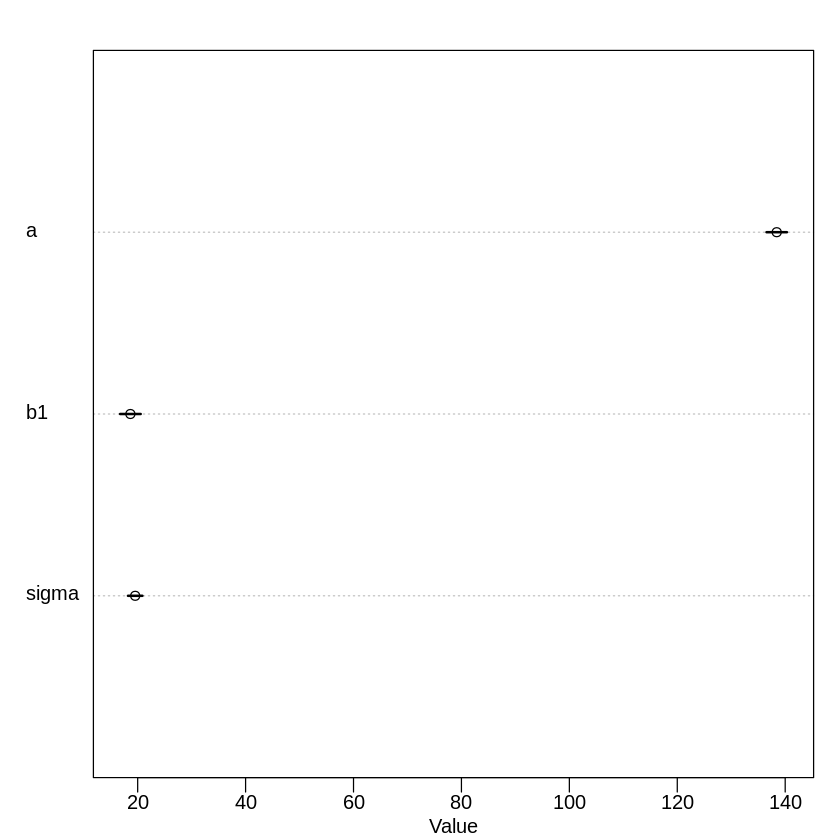

In [17]:
plot(precis(m6H1.1))

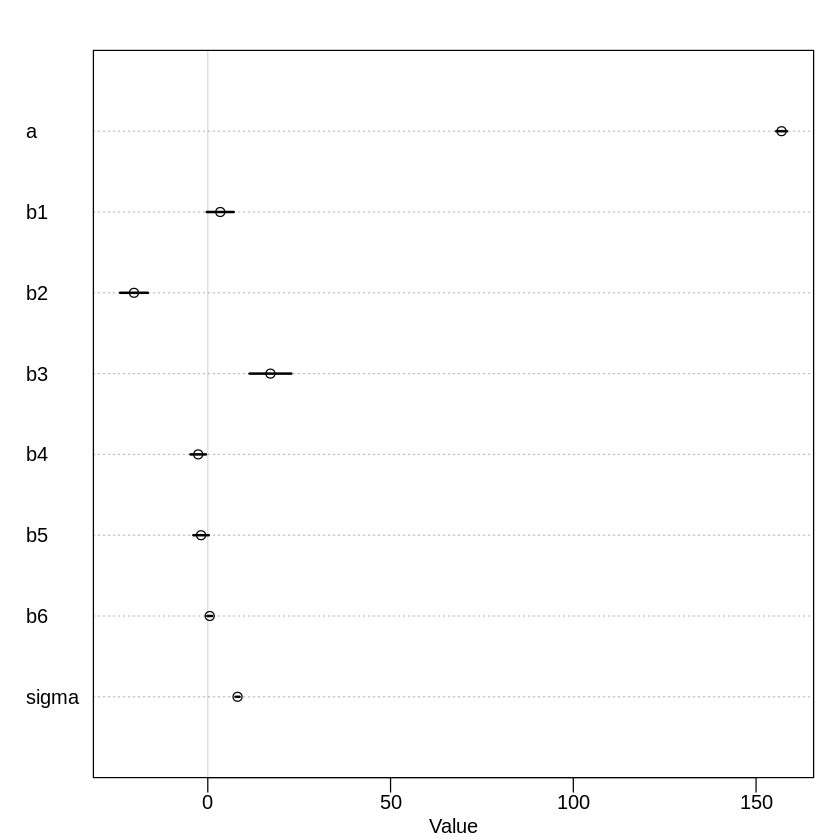

In [18]:
plot(precis(m6H1.6))

In [19]:
WAIC(m6H1.1)

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 2395.57
attr(,"lppd")
[1] -1194.27
attr(,"pWAIC")
[1] 3.51527
attr(,"se")
[1] 22.88113

In [20]:
WAIC(m6H1.2)

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 2150.026
attr(,"lppd")
[1] -1069.807
attr(,"pWAIC")
[1] 5.206112
attr(,"se")
[1] 22.57122

In [13]:
(models <- compare(m6H1.1,m6H1.2,m6H1.3,m6H1.4,m6H1.5,m6H1.6))

         WAIC pWAIC dWAIC weight    SE   dSE
m6H1.4 1926.5   5.9   0.0   0.48 25.56    NA
m6H1.5 1927.5   6.4   1.0   0.30 25.39  1.15
m6H1.6 1928.1   7.5   1.6   0.22 24.94  2.98
m6H1.3 1953.1   5.8  26.6   0.00 24.48 11.02
m6H1.2 2150.1   5.3 223.6   0.00 22.65 26.81
m6H1.1 2395.5   3.4 468.9   0.00 22.97 31.18

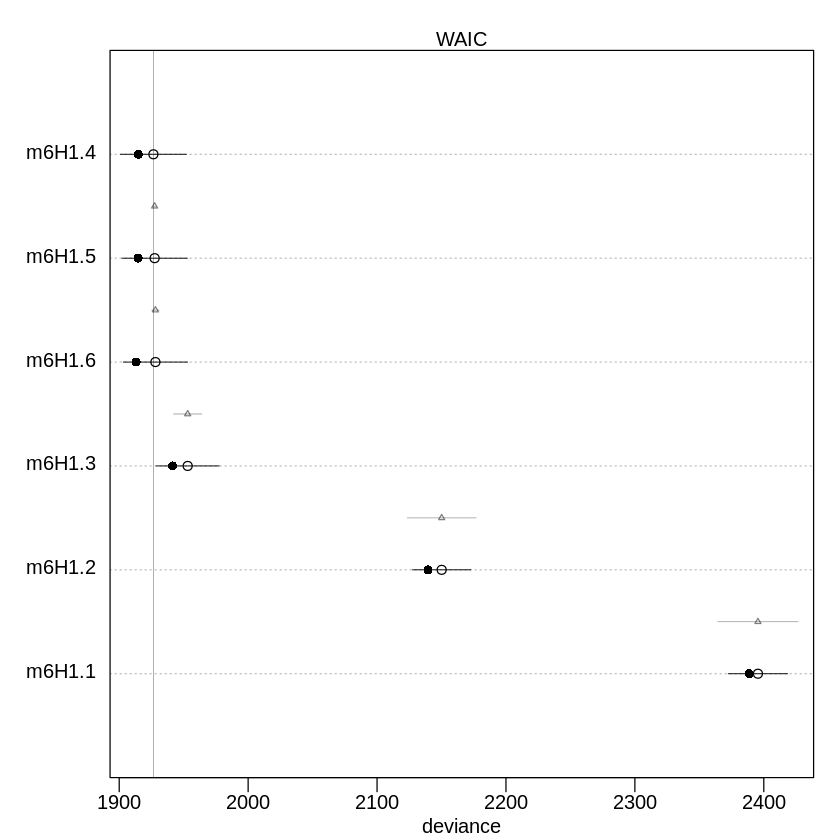

In [14]:
plot(models)

In [21]:
head(d1)

,height,weight,age,male,age2,age3,age4,age5,age6
179,161.925,56.95415,0.4509402,1,0.20334709,0.091697386,0.041350041,1.864640e-02,8.408411e-03
413,148.590,37.56309,0.3208002,0,0.10291279,0.033014447,0.010591043,3.397609e-03,1.089954e-03
62,164.465,45.89784,0.9956002,1,0.99121981,0.986858669,0.982516715,9.781939e-01,9.738900e-01
374,142.240,31.66639,0.3208002,0,0.10291279,0.033014447,0.010591043,3.397609e-03,1.089954e-03
279,149.225,44.08347,1.2848002,0,1.65071161,2.120834649,2.724848831,3.500886e+00,4.497940e+00
37,142.875,38.83881,-0.1129998,0,0.01276895,-0.001442888,0.000163046,-1.842416e-05,2.081925e-06
